# Assignment 2: K-Nearest Neighbors (KNN) & Linear Regression

This assignment focuses on **understanding two fundamental supervised learning algorithms — K-Nearest Neighbors (KNN)** and **Linear Regression** — using simple, interpretable datasets.

You will explore how both models learn from data, visualize their behavior, and reflect on how model parameters, noise, and outliers affect performance.

In [2]:
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load Iris dataset
iris = load_iris()

# Use only two features: sepal length and sepal width
X = iris.data[:, :2]
y = iris.target

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names[:2])
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


---
## Question 1 (10 points): Visualize the Dataset

Create a scatter plot to visualize the relationship between the two features. Color each point by its class (target).

✏️ **Task:**
- Plot sepal length vs sepal width.  
- Use different colors for each class.  
- Label the axes and add a title.

In [3]:
# Your code here
fig = px.scatter(df, x=iris.feature_names[0], y=iris.feature_names[1], color=df['target'].astype(str),
                 title='Sepal Length vs Sepal Width') # add legend
fig.update_layout(legend_title_text='Target')
fig.show()

---
## Question 2 (5 points): Split the Data

Split the dataset into **training (80%)** and **testing (20%)** sets.

✏️ **Task:**
- Use `train_test_split` from `sklearn.model_selection`.  
- Set a fixed `random_state` for reproducibility.  
- Print the number of samples in each set.

In [4]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape} \nTest set size: {X_test.shape}")

Training set size: (120, 2) 
Test set size: (30, 2)


---
## Question 4 (10 points): Train a Baseline KNN Model

Train a KNN classifier using:
- `k = 5`
- The default distance metric (`minkowski`)

✏️ **Task:**
- Fit the model on your training data.  
- Predict on the test data.  
- Print the accuracy, confusion matrix, and classification report.

In [5]:
# Your code here
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]

Accuracy: 0.80, Precision: 0.80, Recall: 0.80


---
## Question 5 (20 points): Effect of Different k Values

Experiment with different values of `k` from 1 to 20. Observe how model performance changes.

✏️ **Task:**
- Loop over `k` values from 1 to 20.  
- For each `k`, train and evaluate the model.  
- Record training and testing accuracy.  
- Plot both accuracies versus `k`.  



In [6]:
# Your code here
accuracy_testing = []
accurracy_training = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k) # This is the default model which uses "Minkowski" distance with p=2 (Euclidean distance)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_testing.append(accuracy_score(y_test, y_pred))
    accurracy_training.append(accuracy_score(y_train, y_pred_train))


# Plot both accuracies vs k
fig = px.line(x=range(1, 21), y=[accuracy_testing, accurracy_training], 
              labels={'x': 'Number of Neighbors (k)', 'y': 'Accuracy'},
              title='KNN Accuracy vs Number of Neighbors (k)',
              markers=True)
fig.data[0].name = 'Test Accuracy'
fig.data[1].name = 'Training Accuracy'
fig.show()


💭 **Reflection:**
- Which value of `k` gives the best performance?  
- What happens when `k` is very small or very large?  
- How do these changes relate to **overfitting** and **underfitting**?
```
1) The value of `k` that gives the best performance would be 9 with a training accuracy of 0.808333 and a test accuracy of 0.8. The reason is that there is stability in the accuracy values around this point, before and after, indicating that the model is almost the same for test and training data and is not overfitting or underfitting.

2) When `k` is very small, the model may capture noise in the training data, leading to overfitting. In contrast, a very large `k` may smooth out the decision boundary too much, resulting in underfitting.

3) These changes relate to overfitting and underfitting as follows: a small `k` will fit the training data well and perform poorly on the test or new data (overfitting), while a large `k` will not capture the complexity of the data, leading to poor performance on both training and test data (underfitting).
```

---
## Question 6 (10 points): Visualize Decision Boundaries

Now that you have found the best value of `k`, let’s see how KNN separates the classes for different distance metrics.

✏️ **Task:**
- For each distance metric, plot how KNN divides the feature space.  
- Show the **regions** belonging to each class and the **test points** on top of them.  
- Compare how the boundaries change for each metric.

💡 **Hint:**  
You can use `np.meshgrid` to create a grid of coordinate points, then predict each point’s class using your trained KNN model.  
Visualize the result using `plt.contourf()` for colored regions and `plt.scatter()` to plot the test samples.


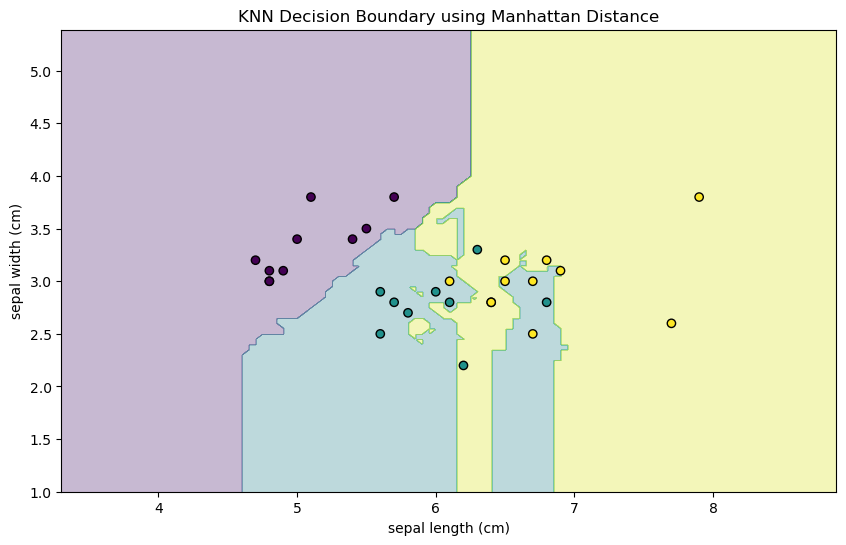

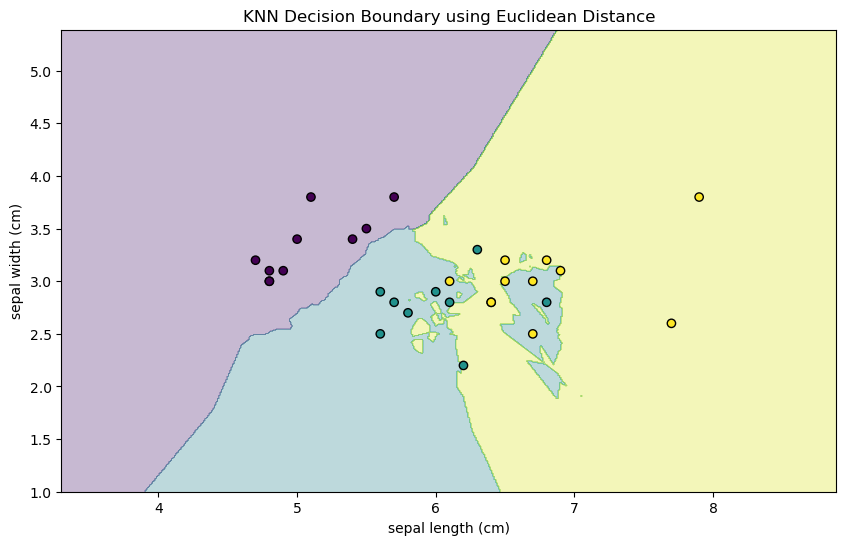

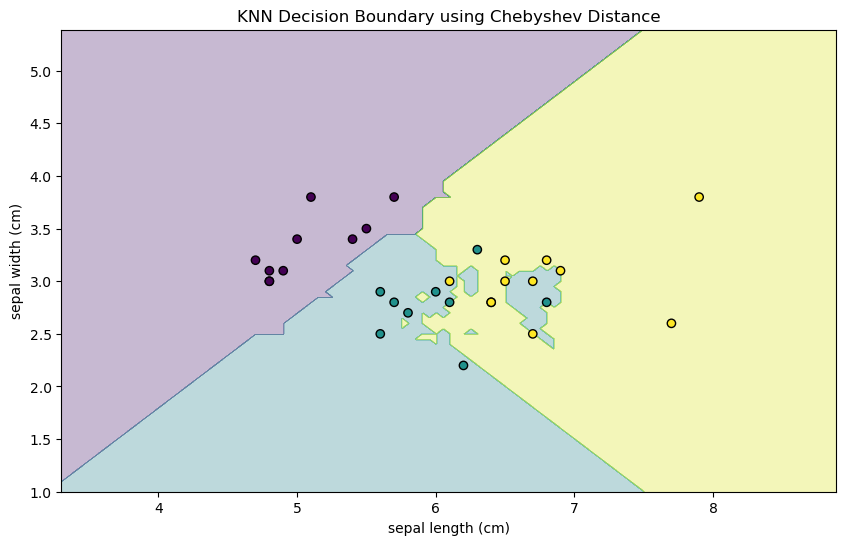

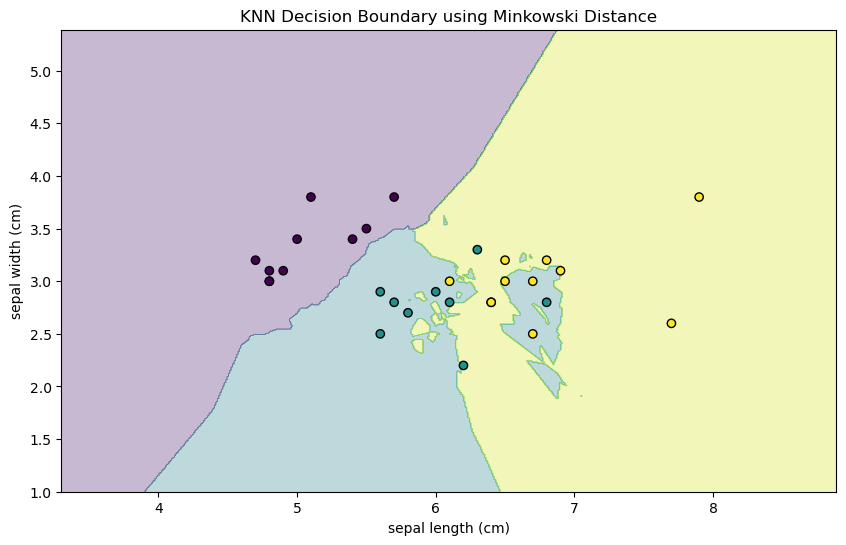

In [7]:
# Your code 
Distance_Arr = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']

for dist in Distance_Arr:
    model = KNeighborsClassifier(n_neighbors=9, metric=dist)
    model.fit(X_train, y_train)
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel() flattens the array from 2D to 1D
    Z = Z.reshape(xx.shape) # Reshape back from 1D to 2D to match xx and yy shape
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
    plt.title(f'KNN Decision Boundary using {dist.capitalize()} Distance')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()
    


```
Based on the visualizations, chebyshev distance would be the most appropriate for this dataset.
```

---
## Q7 – Generate Synthetic Data (10 points)

Explore how **Linear Regression** behaves under different noise levels.

✏️ **Task:**
- Generate two synthetic datasets using `make_regression`:
  - **Scenario 1:** Low noise (`noise=10`)  
  - **Scenario 2:** High noise (`noise=50`)  
- **Visualize** each dataset using a scatter plot:
  - Plot the generated points for both scenarios on separate graphs.  
  - Label the axes and include a title indicating the noise level.

📊 **Hint Example:**
```python
print("--- Scenario 1: Low Noise Data ---")
X1, y1 = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

print("\n--- Scenario 2: High Noise Data ---")
X2, y2 = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
```

In [8]:
# Your code here
print("--- Scenario 1: Low Noise Data ---")
X1, y1 = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

fig = px.scatter(x=X1.flatten(), y=y1, title='Low Noise Regression Data', labels={'x': 'Feature', 'y': 'Target'})
fig.show()

print("\n--- Scenario 2: High Noise Data ---")
X2, y2 = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)

fig = px.scatter(x=X2.flatten(), y=y2, title='High Noise Regression Data', labels={'x': 'Feature', 'y': 'Target'})
fig.show()


--- Scenario 1: Low Noise Data ---



--- Scenario 2: High Noise Data ---


---
## Q8 – Fit Linear Regression Models (20 points)

Now, let’s fit a Linear Regression model to both datasets.

✏️ **Task:**
- Fit one model to each dataset.
- Plot the fitted regression lines on top of the scatter plots.
- Compare visually how noise affects model fit.


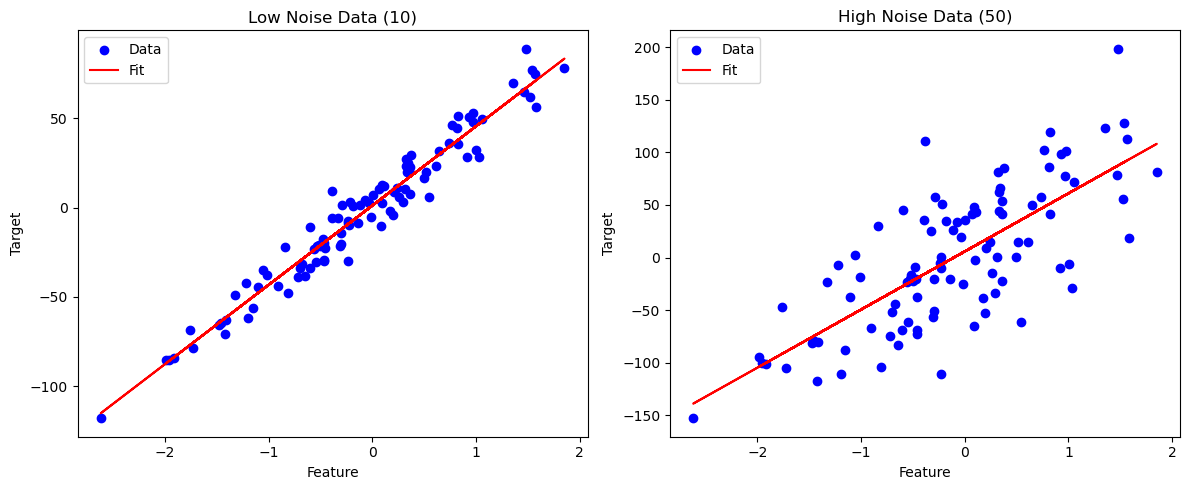

In [9]:
# Your code here
model1 = LinearRegression()
model1.fit(X1, y1)
model2 = LinearRegression()
model2.fit(X2, y2)

#  Plot the fitted regression lines on top of the scatter plots.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X1, y1, color='blue', label='Data')
axes[0].plot(X1, model1.predict(X1), color='red', label='Fit')
axes[0].set(title='Low Noise Data (10)', xlabel='Feature', ylabel='Target')
axes[0].legend()

axes[1].scatter(X2, y2, color='blue', label='Data')
axes[1].plot(X2, model2.predict(X2), color='red', label='Fit')
axes[1].set(title='High Noise Data (50)', xlabel='Feature', ylabel='Target')
axes[1].legend()

plt.tight_layout()
plt.show()


---
## Q9 – Analyze Model Parameters (15 points)

Let’s compare the slope (coefficient) and bias (intercept) of both models.

✏️ **Task:**
- Print slope and bias for each model.
- Discuss how higher noise levels affect model stability and parameters


In [10]:
# Your code here

slope1 = model1.coef_[0]
bias1 = model1.intercept_
slope2 = model2.coef_[0]
bias2 = model2.intercept_

print(f"Low Noise Model (10): Slope = {slope1:.2f}, Bias = {bias1:.2f}")
print(f"High Noise Model (50): Slope = {slope2:.2f}, Bias = {bias2:.2f}")


Low Noise Model (10): Slope = 44.44, Bias = 1.17
High Noise Model (50): Slope = 55.22, Bias = 5.83


```
Higher noise levels can distort and result in less stable model parameters. As we can see from model 1 and 2, adding more noise increases the variability in the slope and bias, making the model less reliable for predictions, as well as worsening the slope and bias values.

Not only does the noise affect the parameters, but it also affects the overall performance of the model, as seen in the scatter plots, the model with higher noise has a worse fit to the data.
```